In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.gridspec import GridSpec

In [2]:
# reading a csv file containing well names and UTM coordenates, using pandas:
header = ['Well_Name', 'UTM_E', 'UTM_N']
data = pd.read_csv('../data/Coordenadas_MP.csv', sep=',', names=header, header=0)
data

,Well_Name,UTM_E,UTM_N
0,1-BRSA-84-BA(1-FRT-1-BA),562179.30,8609874.60
1,1MP-0001-BA,563482.40,8608924.30
2,1MP-0002-BA,562134.03,8608618.93
3,1MP-0003-BA,560798.53,8610888.49
4,3MP-0004-BA,562165.63,8607810.93
5,3MP-0005-BA,561587.00,8611254.30
6,3MP-0006-BA,561524.54,8609007.58
7,3MP-0007-BA,560786.90,8610059.30
8,3MP-0008-BA,560747.80,8611629.50
9,3MP-0009-BA,560706.30,8613273.90


In [3]:
#creating a list of dictionary to save the values of each columns:
wells = []
for i in range(len(data)):
    dicio = {
        'wellname': data['Well_Name'][i],
        'utme': data['UTM_E'][i],
        'utmn': data['UTM_N'][i]
    }
    wells.append(dicio)

In [4]:
#shape file import
shapepath = "../data/campo_crc/campo_crc_WGS.shp"
fields = gpd.read_file(shapepath)

In [5]:
#shape file import
shapepath = "../data/campo_crc/brasil_WGS.shp"
brasil = gpd.read_file(shapepath)

In [6]:
#shape file import
shapepath = "../data/campo_crc/bahia_WGS.shp"
bahia = gpd.read_file(shapepath)

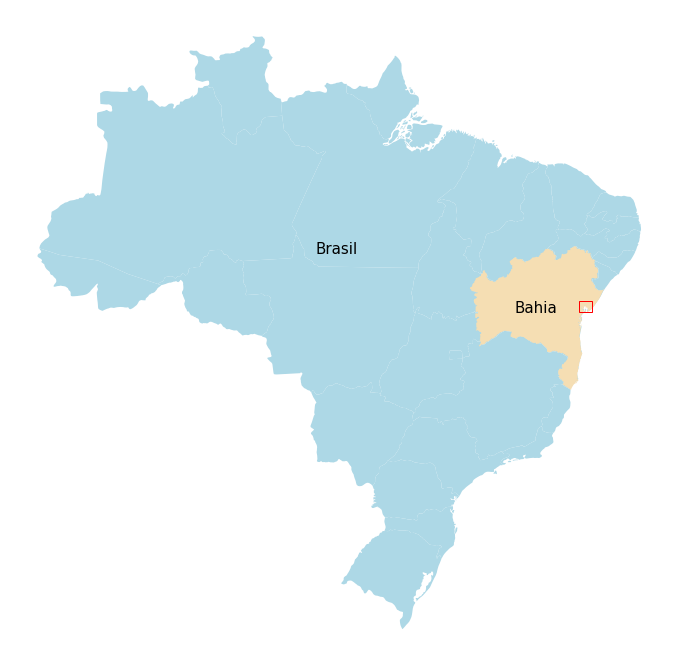

In [7]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot()
brasil.plot(ax=ax1, color='lightblue')
bahia.plot(ax=ax1, color='wheat')
ax1.fill([490000, 490000, 590000, 590000], [8560000, 8640000, 8640000, 8560000], color="red", facecolor='none')
ax1.annotate('Bahia', xy=(0, 8560000), xytext=[0,0], textcoords='offset points', fontsize=15)
ax1.annotate('Brasil', xy=(-1500000, 9000000), xytext=[0,0], textcoords='offset points', fontsize=15)
ax1.axis('off')
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.savefig("../image/brasil.png", dpi=300, transparent=True)
plt.show()

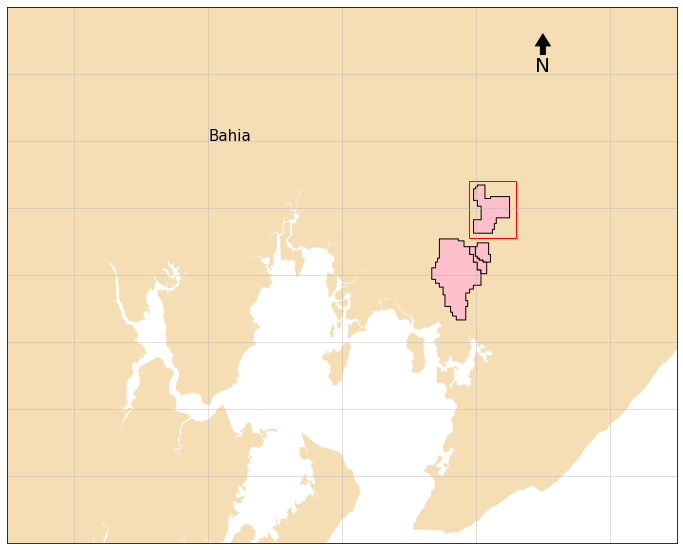

In [8]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot()
bahia.plot(ax=ax1, color='wheat')
fields.plot(ax=ax1, color='pink', edgecolor='black')
ax1.fill([559000, 559000, 566000, 566000], [8605500, 8614000, 8614000, 8605500], color="red", facecolor='none')
ax1.set_ylim(8560000, 8640000)
ax1.set_xlim(490000, 590000)
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,
    right=False,
    labelleft=False, # ticks along the top edge are off
    labelbottom=False)

x, y, arrow_length = 0.8, 0.95, 0.06
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)
ax1.annotate('Bahia', xy=(520000, 8620000), xytext=[0,0], textcoords='offset points', fontsize=15)
plt.savefig("../image/bahia.png", dpi=300, transparent=True)
plt.grid(alpha=0.5)
plt.show()

In [9]:
plt.rcParams.update({'font.size': 15})

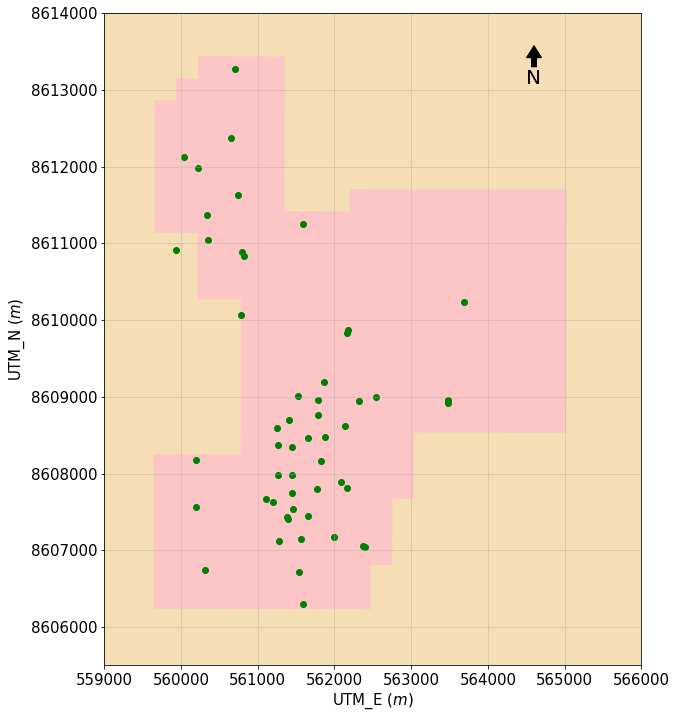

In [25]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot()
bahia.plot(ax=ax1, color='wheat')
fields.plot(ax=ax1, color='pink', alpha=0.8)
for well in wells:
    ax1.scatter(well['utme'], well['utmn'], color='green')
ax1.set_ylim(8605500, 8614000)
ax1.set_xlim(559000, 566000)
x, y, arrow_length = 0.8, 0.95, 0.05
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.grid(alpha=0.5)
plt.savefig("../image/allwells.png", dpi=300, transparent=True)
plt.show()

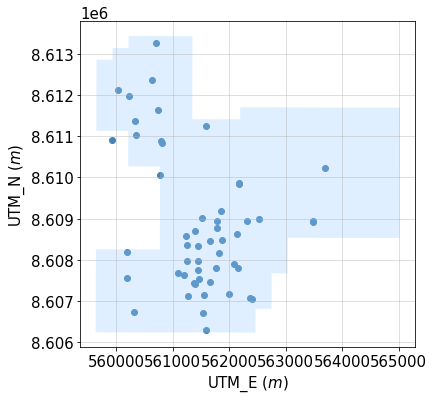

In [11]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot()
x,y = fields.geometry[0].exterior.xy
ax1.fill(x,y, "#99ccff", label=fields.NOM_CAMPO[0], alpha=0.3)
for well in wells:
    ax1.scatter(well['utme'], well['utmn'], color='steelblue')
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.savefig("../image/mp_allwells.png", dpi=300, transparent=True)
plt.grid(alpha=0.5)
plt.show()

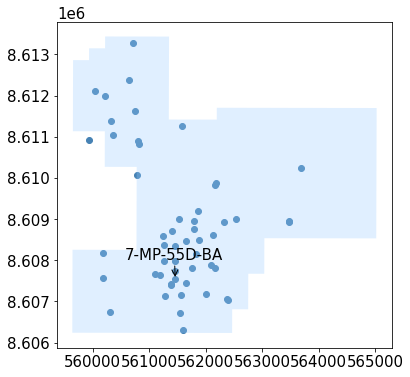

In [12]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot()
x,y = fields.geometry[0].exterior.xy
ax1.fill(x,y, "#99ccff", label=fields.NOM_CAMPO[0], alpha=0.3)
for well in wells:
    ax1.scatter(well['utme'], well['utmn'], color='steelblue')
ax1.annotate(wells[51]['wellname'], xy=(wells[51]['utme'], wells[51]['utmn']), xytext=[-50,20],
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",facecolor='black')
                )
plt.savefig("../image/mp_wellselected.png", dpi=300, transparent=True)
plt.show()

In [13]:
wells[51]

{'wellname': '7-MP-55D-BA', 'utme': 561462.16, 'utmn': 8607543.87}

In [14]:
xchoice = wells[51]['utme']
ychoice = wells[51]['utmn']

In [15]:
dist = []
for well in wells:
    d = np.sqrt((xchoice - well['utme'])**2 + (ychoice - well['utmn'])**2)
    dist.append(d)

In [16]:
numberofwells = 6
wellschosen = []
for i in np.argsort(dist)[:numberofwells]:
    wellschosen.append(wells[i])

In [17]:
wellschosen

[{'wellname': '7-MP-55D-BA', 'utme': 561462.16, 'utmn': 8607543.87},
 {'wellname': '7-MP-25-BA', 'utme': 561381.69, 'utmn': 8607428.57},
 {'wellname': '3MP-0016-BA', 'utme': 561395.8, 'utmn': 8607401.1},
 {'wellname': '7-MP-34D-BA', 'utme': 561449.66, 'utmn': 8607748.78},
 {'wellname': '7-MP-36D-BA', 'utme': 561658.4, 'utmn': 8607451.39},
 {'wellname': '7-MP-47DP-BA', 'utme': 561200.47, 'utmn': 8607630.74}]

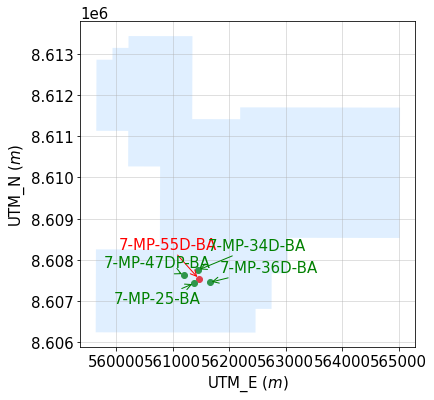

In [18]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot()
x,y = fields.geometry[0].exterior.xy
ax1.fill(x,y, "#99ccff", label=fields.NOM_CAMPO[0], alpha=0.3)

ax1.scatter(wells[51]['utme'], wells[51]['utmn'], color='red')
ax1.annotate(wells[51]['wellname'], xy=(wells[51]['utme'], wells[51]['utmn']), xytext=[-80,30],
                 textcoords='offset points', color='red',
                 arrowprops=dict(arrowstyle="->", color='red')
                )

ax1.scatter(wells[30]['utme'], wells[30]['utmn'], color='green')
ax1.annotate(wells[30]['wellname'], xy=(wells[30]['utme'], wells[30]['utmn']), xytext=[-80,-20],
                 textcoords='offset points', color = 'green',
                 arrowprops=dict(arrowstyle="->", color='green')
                )

ax1.scatter(wells[44]['utme'], wells[44]['utmn'], color='green')
ax1.annotate(wells[44]['wellname'], xy=(wells[44]['utme'], wells[44]['utmn']), xytext=[-80,8],
                 textcoords='offset points', color = 'green',
                 arrowprops=dict(arrowstyle="->", color='green')
                )

ax1.scatter(wells[35]['utme'], wells[35]['utmn'], color='green')
ax1.annotate(wells[35]['wellname'], xy=(wells[35]['utme'], wells[35]['utmn']), xytext=[10,20],
                 textcoords='offset points', color = 'green',
                 arrowprops=dict(arrowstyle="->", color='green')
                )

ax1.scatter(wells[37]['utme'], wells[37]['utmn'], color='green')
ax1.annotate(wells[37]['wellname'], xy=(wells[37]['utme'], wells[37]['utmn']), xytext=[10,10],
                 textcoords='offset points', color = 'green',
                 arrowprops=dict(arrowstyle="->", color='green')
                )
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.savefig("../image/mp_closewells.png", dpi=300, transparent=True)
plt.grid(alpha=0.5)
plt.show()

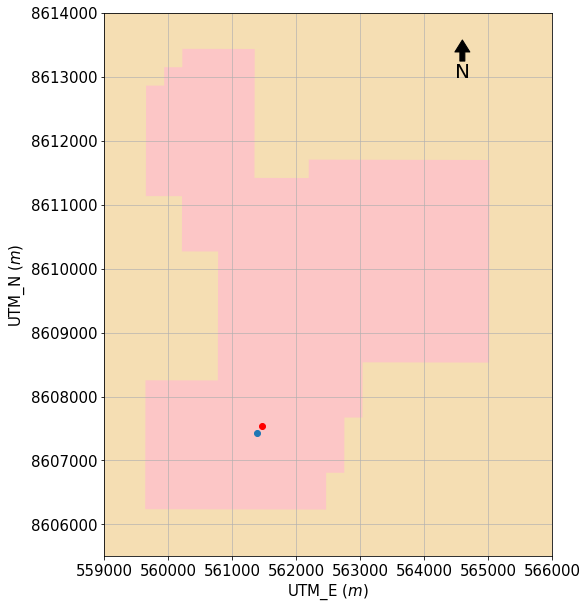

In [26]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot()
bahia.plot(ax=ax1, color='wheat')
fields.plot(ax=ax1, color='pink', alpha=0.8)

ax1.scatter(wells[51]['utme'], wells[51]['utmn'], color='red')
#ax1.annotate(wells[51]['wellname'], xy=(wells[51]['utme'], wells[51]['utmn']), xytext=[30,-15],
#                 textcoords='offset points', color='red',
                 #arrowprops=dict(arrowstyle="->", color='red')
#                )

ax1.scatter(wells[30]['utme'], wells[30]['utmn'])

x, y, arrow_length = 0.8, 0.95, 0.06
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)

ax1.set_ylim(8605500, 8614000)
ax1.set_xlim(559000, 566000)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.grid(alpha=0.8)
plt.savefig("../image/25-BA.png", dpi=300, transparent=True)
plt.show()

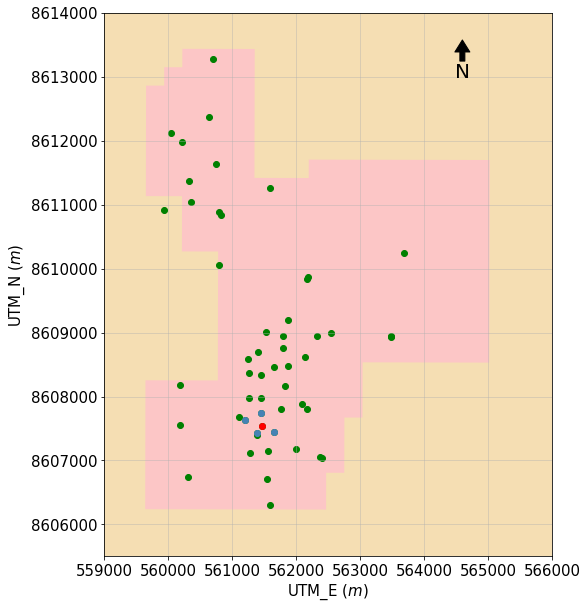

In [27]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot()
bahia.plot(ax=ax1, color='wheat')
fields.plot(ax=ax1, color='pink', alpha=0.8)
for well in wells:
    ax1.scatter(well['utme'], well['utmn'], color='green')
    
ax1.scatter(wells[51]['utme'], wells[51]['utmn'], color='red')
#ax1.annotate(wells[51]['wellname'], xy=(wells[51]['utme'], wells[51]['utmn']), xytext=[30,-15],
#                 textcoords='offset points', color='red',
                 #arrowprops=dict(arrowstyle="->", color='red')
#                )

ax1.scatter(wells[30]['utme'], wells[30]['utmn'], color='steelblue')
#ax1.annotate('1', xy=(wells[30]['utme'], wells[30]['utmn']), xytext=[0,-20],
#                 textcoords='offset points', color = 'steelblue',
                 #arrowprops=dict(arrowstyle="->", color='green')
#                )

ax1.scatter(wells[44]['utme'], wells[44]['utmn'], color='steelblue')
#ax1.annotate('4', xy=(wells[44]['utme'], wells[44]['utmn']), xytext=[1,5],
#                 textcoords='offset points', color = 'steelblue',
                 #arrowprops=dict(arrowstyle="->", color='green')
#                )

ax1.scatter(wells[35]['utme'], wells[35]['utmn'], color='steelblue')
#ax1.annotate('2', xy=(wells[35]['utme'], wells[35]['utmn']), xytext=[2,5],
#                 textcoords='offset points', color = 'steelblue',
                 #arrowprops=dict(arrowstyle="->", color='green')
#                )

ax1.scatter(wells[37]['utme'], wells[37]['utmn'], color='steelblue')
#ax1.annotate('3', xy=(wells[37]['utme'], wells[37]['utmn']), xytext=[3,2],
#                 textcoords='offset points', color = 'steelblue',
                 #arrowprops=dict(arrowstyle="->", color='green')
#                )

x, y, arrow_length = 0.8, 0.95, 0.06
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)

ax1.set_ylim(8605500, 8614000)
ax1.set_xlim(559000, 566000)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('UTM_N $(m)$')
plt.xlabel('UTM_E $(m)$')
plt.grid(alpha=0.5)
plt.savefig("../image/multipocos.png", dpi=300, transparent=True)
plt.show()